<a href="https://colab.research.google.com/github/Daivar/ML-models-training/blob/main/%E2%80%9EMWE_ipynb%E2%80%9C_kopija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-fold cross validation


In [1]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

dataset=range(16)
list(dataset)
KFCrossValidator = KFold(n_splits=4) #, shuffle=False
KFdataset = KFCrossValidator.split(dataset)
print('{} {:^50} {}'.format('Round', 'Training set', 'Testing set'))
for iteration, data in enumerate(KFdataset, start=1):
      print('{:^10} {} {:^30}'.format(iteration, data[0], str(data[1])))

Round                    Training set                    Testing set
    1      [ 4  5  6  7  8  9 10 11 12 13 14 15]           [0 1 2 3]           
    2      [ 0  1  2  3  8  9 10 11 12 13 14 15]           [4 5 6 7]           
    3      [ 0  1  2  3  4  5  6  7 12 13 14 15]         [ 8  9 10 11]         
    4      [ 0  1  2  3  4  5  6  7  8  9 10 11]         [12 13 14 15]         


# Test/train split

In [2]:
import numpy as np

def print_paired(p1, p2):
  print("-----")
  for i in zip(p1, p2):
    print(f'{i[0]} -> {i[1]}')

X, y = np.arange(10).reshape((5, 2)), range(5)
print_paired(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y) # test_size=0.1, shuffle=False, random_state=42
print_paired(X_train, y_train)
print_paired(X_test, y_test)

-----
[0 1] -> 0
[2 3] -> 1
[4 5] -> 2
[6 7] -> 3
[8 9] -> 4
-----
[2 3] -> 1
[8 9] -> 4
[0 1] -> 0
-----
[4 5] -> 2
[6 7] -> 3


# Univariate linear regression

-----
0 -> 1
1 -> 5
2 -> 8
3 -> 8
4 -> 12
5 -> 12
6 -> 15
7 -> 18
8 -> 21
9 -> 18
===== metrics =====
0.9408940894089409
[2.03636364]
2.6363636363636367
f(x)=2.0363636363636366x+2.6363636363636367


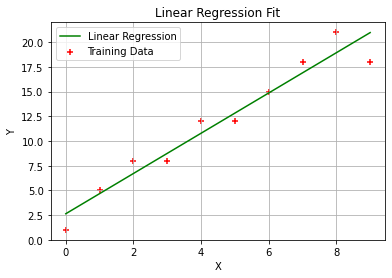

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random

def print_paired(p1, p2):
  print("-----")
  for i in zip(p1, p2):
    print(f'{i[0]} -> {i[1]}')

# X = np.array([0, 1, 2, 3, 4, 5])
X = np.arange(10)

# no noise
# y = np.dot(X, 2) + 3

# with noise
y = np.dot(X, 2)
for i, y_val in enumerate(y):
  y[i] += random.randint(0,5)

print_paired(X, y)

reg = LinearRegression().fit(X.reshape(-1, 1), y) # reshape to get the data into the form: [[1], [2]]

plt.scatter(X, y, color='red', marker= '+', label= 'Training Data')
plt.plot(X, reg.predict(np.arange(X.shape[0]).reshape(-1, 1)), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

print("===== metrics =====")
print(reg.score(X.reshape(-1, 1), y)) # r^2
# ... to get the slope and y-intercept 
print(reg.coef_)
print(reg.intercept_)
print(f'f(x)={reg.coef_[0]}x+{reg.intercept_}')